In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("./emails.csv")

In [3]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [5]:
X = df.iloc[:,1:3001]
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [6]:
X = df.iloc[:, 1:3001]
Y = df.iloc[:, -1].values

In [7]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.25)


In [10]:
svc = SVC(C=1.0, kernel='rbf', gamma='auto')
svc.fit(train_x, train_y)
y_pred2 = svc.predict(test_x)
print("Accuracy Score for SVC : ", accuracy_score(y_pred2, test_y))

Accuracy Score for SVC :  0.9095127610208816


In [11]:
# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(train_x, train_y)
y_pred_knn = knn.predict(test_x)
print("Accuracy Score for KNN:", accuracy_score(y_pred_knn, test_y))

Accuracy Score for KNN: 0.868522815158546


In [12]:
# Split the data into features (X) and labels (Y)
X = df.iloc[:, 1:3001]
Y = df.iloc[:, -1].values

In [13]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,  # Import precision_score
    recall_score,     # Import recall_score
    f1_score,         # Import f1_score
    confusion_matrix,
)


In [15]:
# Split the data into training and testing sets (or use cross-validation)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [17]:
# Fit the SVM classifier to the training data
svc = SVC(C=1.0, kernel='rbf', gamma='auto')
svc.fit(X_train, y_train)

# Use the trained SVM classifier to make predictions
y_pred_svc = svc.predict(X_test)

# Calculate performance metrics
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_score_svc = f1_score(y_test, y_pred_svc)
confusion_matrix_svc = confusion_matrix(y_test, y_pred_svc)


In [18]:
# K-Nearest Neighbors (KNN) Classifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [19]:
# Calculate performance metrics for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_score_knn = f1_score(y_test, y_pred_knn)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)

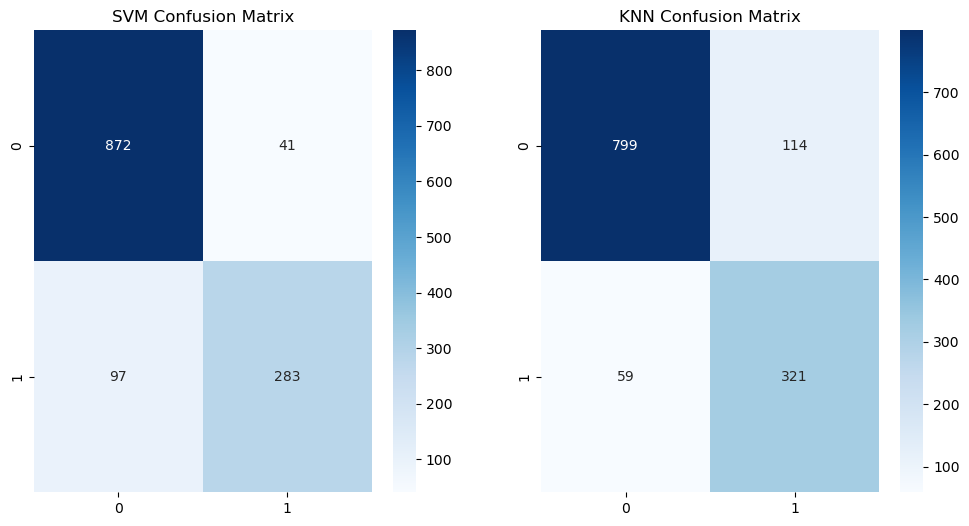

In [20]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix_svc, annot=True, fmt="d", cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix_knn, annot=True, fmt="d", cmap="Blues")
plt.title("KNN Confusion Matrix")
plt.show()

In [21]:
# Print and analyze the results
print("SVM Model Metrics:")
print(f"Accuracy: {accuracy_svc}")
print(f"Precision: {precision_svc}")
print(f"Recall: {recall_svc}")
print(f"F1 Score: {f1_score_svc}")

SVM Model Metrics:
Accuracy: 0.8932714617169374
Precision: 0.8734567901234568
Recall: 0.7447368421052631
F1 Score: 0.8039772727272727


In [22]:
print("KNN Model Metrics:")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_score_knn}")


KNN Model Metrics:
Accuracy: 0.8662026295436969
Precision: 0.7379310344827587
Recall: 0.8447368421052631
F1 Score: 0.7877300613496934
